In [96]:
import numpy as np
import pandas as pd
import csv
import scipy 
import os
import random
import matplotlib.pyplot as plt

In [11]:
def combineCSVs(datafolder):
    """
    Combine all participant data into one pandas df
    OR 
    Create df for single participant file 
    """
    
    exclude = []
    
    #checks if path is a file 
    isFile = os.path.isfile(datafolder)
    print(isFile)

    #checks if path is a directory
    
    isDirectory = os.path.isdir(datafolder)
    
    if isDirectory == True:
        data = []
        for filename in os.listdir(datafolder):
            if 'csv' in filename:
                path = datafolder + "/" + filename
                df = pd.read_csv(path, index_col=None, header=0)
                
                # do NOT include subject IDs that have been flagged 
                subjID = df.subjID.unique()[0]
                if subjID not in exclude:
                    data.append(df)

                
        input_frame = pd.concat(data, axis=0, ignore_index=True)
        
    if isFile == True:
        if 'csv' in datafolder:
            input_frame = pd.read_csv(datafolder, index_col=None, header=0)
    
 
    return input_frame

In [30]:
data_path = '/Users/pmahableshwarkar/Documents/object_scene_scaling/v6_b1_data.csv'
# data_path = '/Users/prachimahableshwarkar/Documents/GW/OSS/v6_b1_data.csv'
# data_path = '/Users/prachimahableshwarkar/Documents/GW/FacialAge/FacialAge_MTurk/OSS_MTurk/data'

In [31]:
df = combineCSVs(data_path)

True


In [32]:
df.columns

# misscaled, objectScene1SemanticCongruency, scene1ZoomName, scene2SizeCong, scene2SemCong, scene2ZoomName, accuracy, RT

Index(['subjID', 'experimentName', 'versionName', 'windowWidth',
       'windowHeight', 'screenWidth', 'screenHeight', 'startDate', 'startTime',
       'pracTries', 'trialNum', 'objectSize', 'objectCategory', 'object',
       'misscaled', 'objectScene1SemanticCongruency', 'scene1ZoomName',
       'scene1Category', 'scene1', 'scene2SizeCong', 'scene2SemCong',
       'scene2ZoomName', 'scene2Category', 'scene2', 'keyPress', 'accuracy',
       'RT', 'experimentTime', 'totalTime'],
      dtype='object')

In [33]:
misscaled = np.array(df['misscaled'])
objectScene1SemanticCongruency = np.array(df['objectScene1SemanticCongruency'])
scene1ZoomName = np.array(df['scene1ZoomName'])
scene2SizeCong = np.array(df['scene2SizeCong'])
scene2SemCong = np.array(df['scene2SemCong'])
scene2ZoomName = np.array(df['scene2ZoomName'])
accuracy = np.array(df['accuracy'])
RT = np.array(df['RT'])

len(misscaled), len(RT)

(336, 336)

In [43]:
og_data = [misscaled, objectScene1SemanticCongruency, scene1ZoomName, scene2SizeCong, scene2SemCong, scene2ZoomName, accuracy, RT]

### Take random subset of data for a range of fractions 

In [78]:
def lists_to_df(data, cols):

    df = pd.DataFrame()
    
    for i in range(len(data)):
        df[cols[i]] = data[i]
    
    print(len(df))
    
    return df

In [81]:
frac = [0.2, 0.4, 0.6, 0.8, 1]
reps = 100
all_frac_dfs = []
for i in range(len(frac)):
    all_reps = []
    for i in range(reps):
    # Shuffle two lists with same order
    # Using zip() + * operator + shuffle()
    temp = list(zip(misscaled, objectScene1SemanticCongruency, scene1ZoomName, scene2SizeCong, scene2SemCong, scene2ZoomName, accuracy, RT))
    random.shuffle(temp)

    s_misscaled, s_objectScene1SemanticCongruency, s_scene1ZoomName, s_scene2SizeCong, s_scene2SemCong, s_scene2ZoomName, s_accuracy, s_RT = zip(*temp)

    # res1 and res2 come out as tuples, and so must be converted to lists.
    s_misscaled, s_objectScene1SemanticCongruency, s_scene1ZoomName, s_scene2SizeCong, s_scene2SemCong, s_scene2ZoomName, s_accuracy, s_RT = list(s_misscaled), list(s_objectScene1SemanticCongruency), list(s_scene1ZoomName), list(s_scene2SizeCong), list(s_scene2SemCong), list(s_scene2ZoomName), list(s_accuracy), list(s_RT)
    
    data = [s_misscaled, s_objectScene1SemanticCongruency, s_scene1ZoomName, s_scene2SizeCong, s_scene2SemCong, s_scene2ZoomName, s_accuracy, s_RT]
    frac_data = []
    for elem in data:
        frac_elem = elem[:int(len(elem)*frac[i])]
        frac_data.append(frac_elem)

    cols = ['misscaled', 'objectScene1SemanticCongruency', 'scene1ZoomName', 'scene2SizeCong', 'scene2SemCong', 'scene2ZoomName', 'accuracy', 'RT']
    frac_df = lists_to_df(frac_data, cols)
    all_frac_dfs.append(frac_df)
    
    
        
        
        

67
134
201
268
336


In [94]:
for f in frac:
    print(int(len(og_data[0]) * f), len(og_data[0]) + int(len(og_data[0]) * f))


67 403
134 470
201 537
268 604
336 672


In [88]:
og_df = pd.DataFrame()
cols = ['misscaled', 'objectScene1SemanticCongruency', 'scene1ZoomName', 'scene2SizeCong', 'scene2SemCong', 'scene2ZoomName', 'accuracy', 'RT']
    
for i in range(len(og_data)):
    og_df[cols[i]] = og_data[i]
    
# og_df

### Add original data to the fraction of the data 

In [92]:
for i in range(len(frac)):
    frac_df = all_frac_dfs[i]
    fraction = str(frac[i])
    print(fraction)
    new_df = pd.concat([og_df, frac_df])
    new_df.to_csv('power_analysis/v6_b1_data_' + fraction + '.csv', index=False)

0.2
0.4
0.6
0.8
1


### Plot percent increase in data against effect size

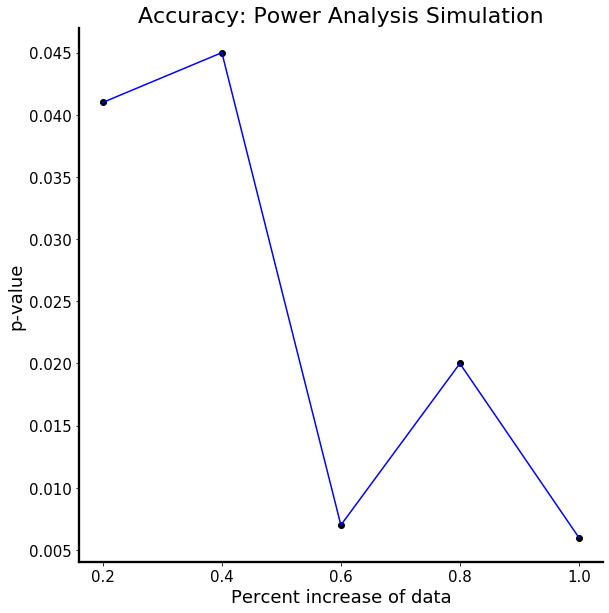

In [112]:
effect_size = [0.041, 0.045, 0.007, 0.02, 0.006]

fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
plt.tight_layout()

plt.plot(frac, effect_size, 'o', color='black')
plt.plot(frac, effect_size, color='blue')

plt.xticks(np.arange(0.2, 1.2, 0.2), fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('p-value', fontsize=18)
plt.xlabel('Percent increase of data', fontsize=18)

plt.title('Accuracy: Power Analysis Simulation', fontsize=22)

plt.show();